<h1>Localization Data Intern Test Report - Supercell</h1>
<i>Konsta Nyman</i>

In [1]:
# imports

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [2]:
# create a SQL connection to our SQLite database
conn = sqlite3.connect("./sample.sqlite")

# create pandas dataframe from SQL database table 'account'
df_account = pd.read_sql ('''
                               SELECT
                               *
                               FROM account
                               ''', conn)

# create pandas dataframe from SQL database table 'account_date_session'
df_account_date_session = pd.read_sql ('''
                               SELECT
                               *
                               FROM account_date_session
                               ''', conn)

# create pandas dataframe from SQL database table 'iap_purchase'
df_iap_purchase = pd.read_sql ('''
                               SELECT
                               *
                               FROM iap_purchase
                               ''', conn)

# close the connection
conn.close()

# drop na values from all data frames
""" df_account = df_account.dropna()
df_account_date_session = df_account_date_session.dropna()
df_iap_purchase = df_iap_purchase.dropna() """


' df_account = df_account.dropna()\ndf_account_date_session = df_account_date_session.dropna()\ndf_iap_purchase = df_iap_purchase.dropna() '

In [3]:
# Create an overview of dataframes

df_account

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1
1,4308483975,2016-03-02 20:57:46.14,MIDC147PJ,Android,FR,2
2,17193137415,2016-03-02 13:52:16.735,SM-G360F,Android,IT,2
3,21488104920,2016-03-02 12:43:27.899,H60-L01,Android,CN,8
4,21488107995,2016-03-02 17:20:12.145,GT-I9500,Android,RU,2
...,...,...,...,...,...,...
112787,51554039942,2016-08-07 13:32:49.115,KOPO L128,Android,CN,4
112788,51554090637,2016-08-11 22:20:27.192,SM-G3608,Android,CN,15
112789,51554102314,2016-08-12 21:10:20.742,"iPhone8,4",iOS,US,1
112790,51554116380,2016-08-14 01:37:13.821,SM-G935F,Android,HR,2


In [4]:
df_account_date_session

,account_id,date,session_count,session_duration_sec
0,68730811144,2016-01-01,1,47
1,68730812806,2016-01-01,1,204
2,68730829426,2016-01-01,12,4703
3,68730829426,2016-01-02,9,4676
4,68730829426,2016-01-03,9,2271
...,...,...,...,...
1698969,55850490316,2016-12-30,1,392
1698970,55850515956,2016-12-30,1,564
1698971,55850515956,2016-12-31,9,3268
1698972,55850519336,2016-12-31,9,4043


In [5]:
df_iap_purchase

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id
0,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0
1,30077202816,2016-05-31 11:24:37.283,dd4c1bda4f2c904075fb2fbfcf30f30e,369,0
2,21487283560,2016-02-13 03:40:28.644,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
3,21487152816,2016-02-28 00:53:26.678,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
4,8602037685,2016-02-11 01:03:04.727,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
...,...,...,...,...,...
9904,51552698769,2016-07-23 03:25:58.87,99a9e0e63efa2fdce8fc8de74c66cea9,184,1
9905,51552698769,2016-07-25 05:57:33.827,99a9e0e63efa2fdce8fc8de74c66cea9,184,1
9906,51552698769,2016-11-14 01:01:11.202,efd2eebfdc98b55f9e6b45915d56f7ac,36,1
9907,51552698769,2016-12-02 13:43:30.761,efd2eebfdc98b55f9e6b45915d56f7ac,36,1


<h2>Question 1: Give us short description of datasets.</h2>

<h5>account</h5>

<p>The dataset "account" contains over 100 000 observations of accounts, each containing 6 variables: </p>

<table>
    <tr>
        <td><strong>account_id:</strong></td>
        <td>Identification number for the account</td>
    </tr>
    <tr>
        <td><strong>created_time:</strong></td>
        <td>Date and time the account was created</td>
    </tr>
    <tr>
        <td><strong>created_device:</strong></td>
        <td>The device the account was created on</td>
    </tr>
    <tr>
        <td><strong>created_platform:</strong></td>
        <td>The platform the account was created on</td>
    </tr>
    <tr>
        <td><strong>country_code:</strong></td>
        <td>The ISO code of the country the account was created in</td>
    </tr>
    <tr>
        <td><strong>created_app_store_id:</strong></td>
        <td>ID number of the app store the game was downloaded from</td>
    </tr>
</table>

<h5>account_date_session</h5>
<p>The dataset "account_date_session" contains nearly 1,7 million observations of game sessions made by players. It contains 4 variables:</p>

<table>
    <tr>
        <td><strong>account_id:</strong></td>
        <td>Identification number for the account the sessions were made on</td>
    </tr>
    <tr>
        <td><strong>date:</strong></td>
        <td>Date in which sessions were made</td>
    </tr>
    <tr>
        <td><strong>session_count:</strong></td>
        <td>How many sessions were made by a player in a single day</td>
    </tr>
    <tr>
        <td><strong>session_duration_sec:</strong></td>
        <td>The total duration of the sessions by one player in a single day in seconds</td>
    </tr>
</table>

<h5>iap_purchase</h5>
<p>The dataset "iap_purchase" contains nearly 10 000 observations of in app purchases made by players. It contains 5 variables:</p>

<table>
    <tr>
        <td><strong>account_id:</strong></td>
        <td>Identification number for the account the purchase was made on</td>
    </tr>
    <tr>
        <td><strong>created_time:</strong></td>
        <td>Date and time the purchase was made on</td>
    </tr>
    <tr>
        <td><strong>package_id_hash:</strong></td>
        <td>Hash type identification of the purchased item/product</td>
    </tr>
    <tr>
        <td><strong>iap_price_usd_cents:</strong></td>
        <td>The price of the purchased item in U.S. cents</td>
    </tr>
    <tr>
        <td><strong>app_store_id:</strong></td>
        <td>ID number of the app store the purchase was made in</td>
    </tr>
</table>

<h2>Question 2: Analyse the daily active users</h2>

<i>We'll consider DAU as the number of users that have opened the game at least once on a given day in this report.</i>

<h3>Changes over time</h3>

<h4>Plot of the whole year</h4>

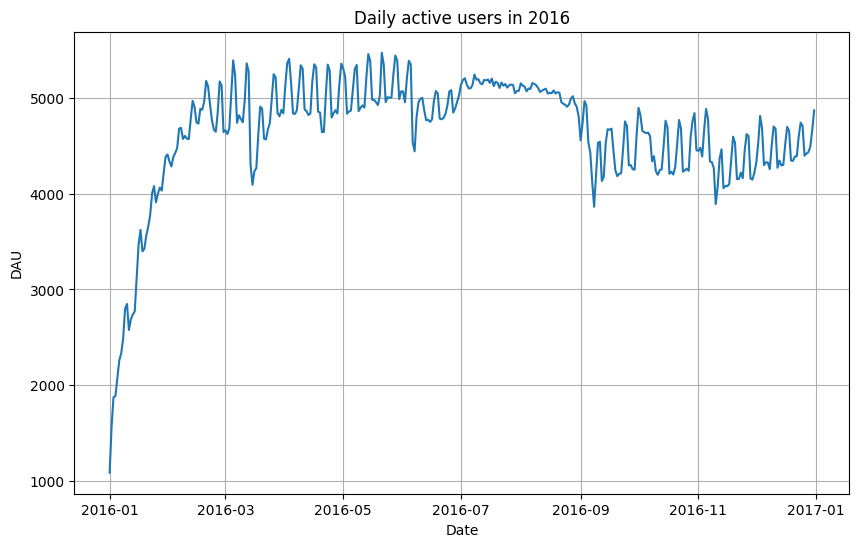

In [60]:
# plot the DAU into a line plot which showcases the change of DAU over time

# count the number of DAU per day
df_account_date_session['date'] = pd.to_datetime(df_account_date_session['date'])
daily_counts = df_account_date_session.resample('D', on='date').size()

# create figure and plot data in a line plot
plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('DAU')
plt.title('Daily active users in 2016')
plt.grid(True)
plt.show()

<h4>Brief overview</h4>

<p>The DAU rises quickly in the beginning of the year. It steadies around the end of February to around 5 000 DAU. It oscillates around that mark and even rises a little but then suddenly drops in the beginning of June. Then rises back in the middle of July and steadily drops below 5 000 during the end of summer and drops suddenly in the beginning of September. The DAU then continues to oscillate around 4 500 users.</p>

<h4>Trends</h4>

<p>The main trend in the DAU is that it quickly rises to 5 000. Then steadily drops to about 4 500 and flattens around that mark, which seems very normal. The game is first found by people and the game gains player-base quickly. Then many players try it and then a steady player-base is formed.</p>

<p>The oscillation is due to different weekdays, which is showcased more clearly in the plot of the month of April displayed below. People have more time to play on the weekends. This also explains the reduced oscillation in the summer when people are on their summer breaks, and the day of the week doesn't matter as much.</p>

<p>One other trend I find interesting is the steady rise in the fall with the sudden drop in the beginning of November. I don't see a clear and obvious reason for this - might be wise to investigate this further. Other important dips are the one during March and the one in the beginning of September. They might be the cause of a technical issue or a launch of a competitive game.</p>



<h4>Plot for April</h4>

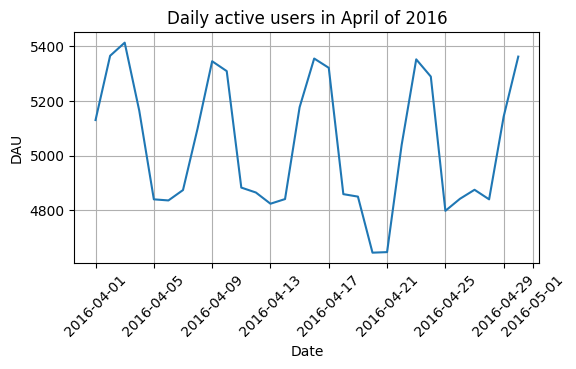

In [61]:
# DAU of April

# count the number of DAU per day in the month of April
df_account_date_session_april = df_account_date_session[df_account_date_session['date'].dt.month == 4]
daily_counts = df_account_date_session_april.resample('D', on='date').size()

# create figure and plot data in a line plot
plt.figure(figsize=(6,3))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('DAU')
plt.title('Daily active users in April of 2016')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h2>Question 3: Analyse sales</h2>

<h3>The geographical split of the revenue and users</h3>

<h4>Geographical split of users</h4>

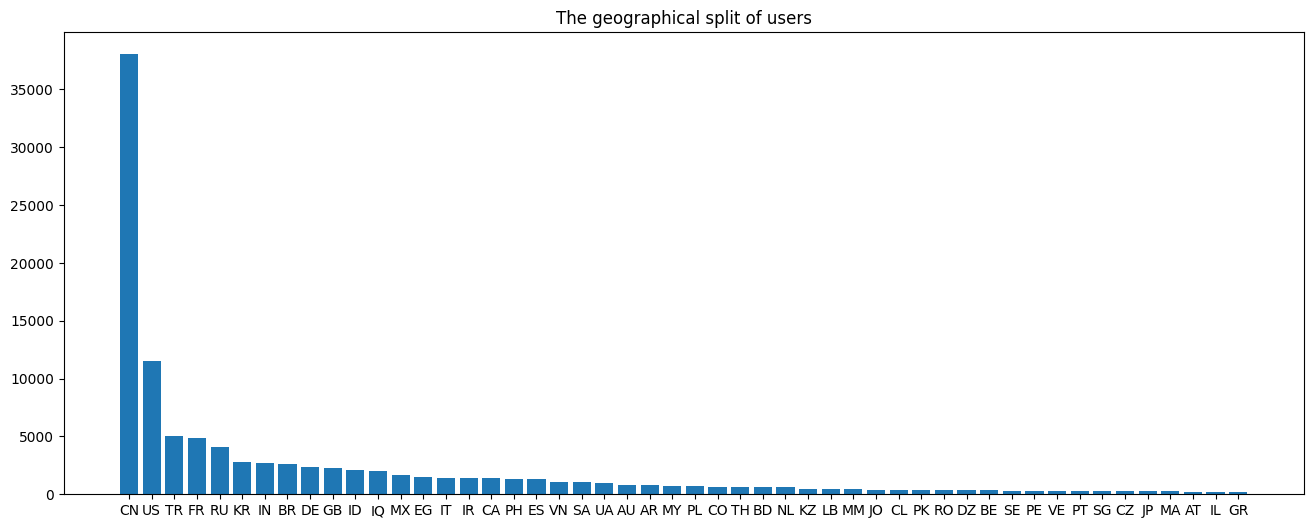

In [31]:
# count the number of user per country
country_counts = df_account['country_code'].value_counts()

# plot top 50 values to make the plot readable

top_50_values = country_counts[:50]
sizes = top_50_values.values
labels = top_50_values.index

plt.figure(figsize=(16,6))
plt.bar(labels, sizes)
plt.title('The geographical split of users')
plt.show()

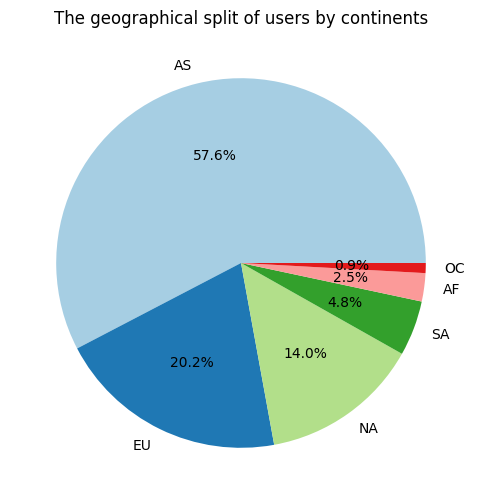

In [17]:
# create new column with continent codes
df_account['continent_code'] = df_account['country_code'].apply(lambda x: pc.country_alpha2_to_continent_code(x) \
                                                                if x != None and x != 'SX' and x != 'TL' else None) 
                                                                # pycountry doesn't recognize SX (Saint Maarten(Dutch))
                                                                # and TL (Timor-Leste) but amounts are so small (1 and 2)
                                                                # that we can ignore them, also ignore 'None' values

# count the number of user per continent
continent_counts = df_account['continent_code'].value_counts()

# create figure and plot continental data in a line plot
plt.figure(figsize=(10,6))
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('The geographical split of users by continents')
plt.show()


<p>We can see that the majority of the player-base is located in Asia, mainly in China. The US also has a quite large player-base, but when looked at a continental level, Europe has a larger player-base than the Americas combined with the next tree largest proportions - Turkey, France and Russia all belonging to it along many others. Africa, Australia and Oceania don't have a very large player-base.</p>

<h4>Geographical split of revenue</h4>

In [39]:
# group and sum together the purchase actions made by the same player
summed_df_iap_purchase = df_iap_purchase.groupby('account_id')['iap_price_usd_cents'].sum().reset_index()

# merge country and continent codes by account id
merged_df_iap_purchase = pd.merge(summed_df_iap_purchase, df_account.iloc[:, [0, 4, 6]], on='account_id', how='inner')
merged_df_iap_purchase.head()

,account_id,iap_price_usd_cents,country_code,continent_code
0,12322622,328,CN,AS
1,12336472,18107,CN,AS
2,12348106,1105,GB,EU
3,12352080,184,CA,NA
4,12365400,1728,CN,AS


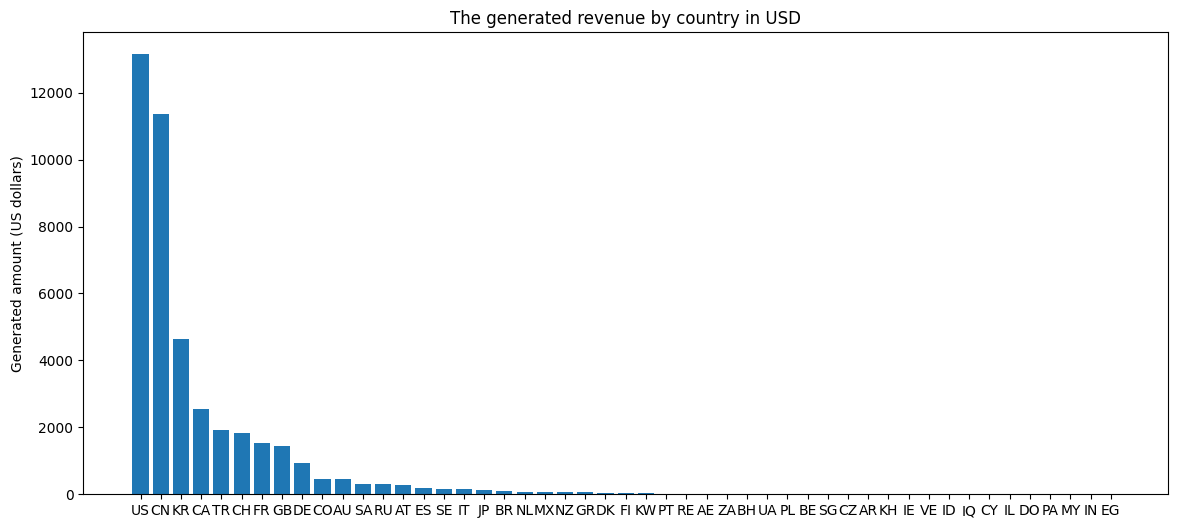

In [59]:
# plot revenue generated by countries

# count the revenue generated by country
revenue_sum = merged_df_iap_purchase.groupby('country_code')['iap_price_usd_cents'].sum()
sorted_revenue_sum = (revenue_sum/100).sort_values(ascending=False) #sort values and convert cents to dollars

# create plot
plt.figure(figsize=(14,6))
plt.bar(sorted_revenue_sum.index, sorted_revenue_sum.values)
plt.title('The generated revenue by country in USD')
plt.ylabel('Generated amount (US dollars)')
plt.show()

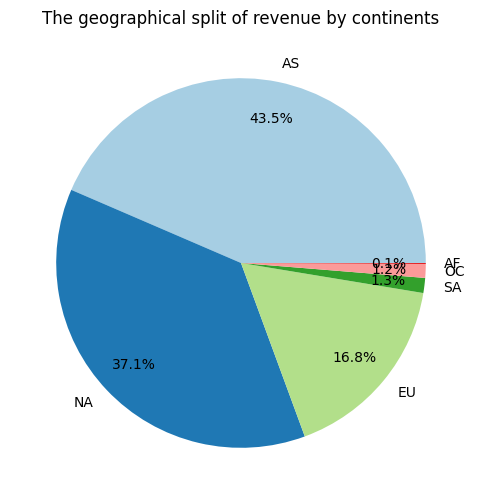

In [69]:
# plot revenue generated by countries

# count the revenue generated by country
revenue_sum_cont = merged_df_iap_purchase.groupby('continent_code')['iap_price_usd_cents'].sum()
sorted_revenue_sum_cont = (revenue_sum_cont/100).sort_values(ascending=False) #sort values and convert cents to dollars

# create plot
plt.figure(figsize=(10,6))
plt.pie(sorted_revenue_sum_cont.values, labels=sorted_revenue_sum_cont.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, pctdistance=0.8)
plt.title('The geographical split of revenue by continents')
plt.show()

<p>We can see that the United States generated more revenue than China, even though its player base is about a third of size of China's. China did generate substantial amount of revenue also. South Korea and Canada generated quite a lot of revenue per player. Switzerland comes in as a big revenue generator despite its small player base. Even though the US and Canada generated great revenue, Asia is the biggest market in terms of revenue with China and South Korea generating substantial amounts of revenue. However, North America took the largest slice of the revenue in comparison to player base sizes to which we'll get to next in more detail.</p>

<h4>Average revenue per user per market</h4>
<i>We will consider different markets as countries, not continents, in this report</i>

In [82]:
# create data frames of 'revenue per country' and 'users per country'
df_revenue_sum = pd.DataFrame(revenue_sum)
df_country_counts = pd.DataFrame(country_counts)

# merge data frames
merged_df_revenue_market = pd.merge(df_revenue_sum, df_country_counts, on='country_code', how='outer')

# create new column 'revenue_per_user'
merged_df_revenue_market['revenue_per_user'] = merged_df_revenue_market['iap_price_usd_cents']/merged_df_revenue_market['count']
merged_df_revenue_market = merged_df_revenue_market.sort_values('revenue_per_user', ascending=False) #sort by 'revenue_per_user'
merged_df_revenue_market.head()

,iap_price_usd_cents,count,revenue_per_user
country_code,,,
CH,182774.0,198,923.101010
CA,254506.0,1378,184.692308
KR,463518.0,2817,164.543131
AT,28471.0,238,119.626050
US,1314818.0,11553,113.807496


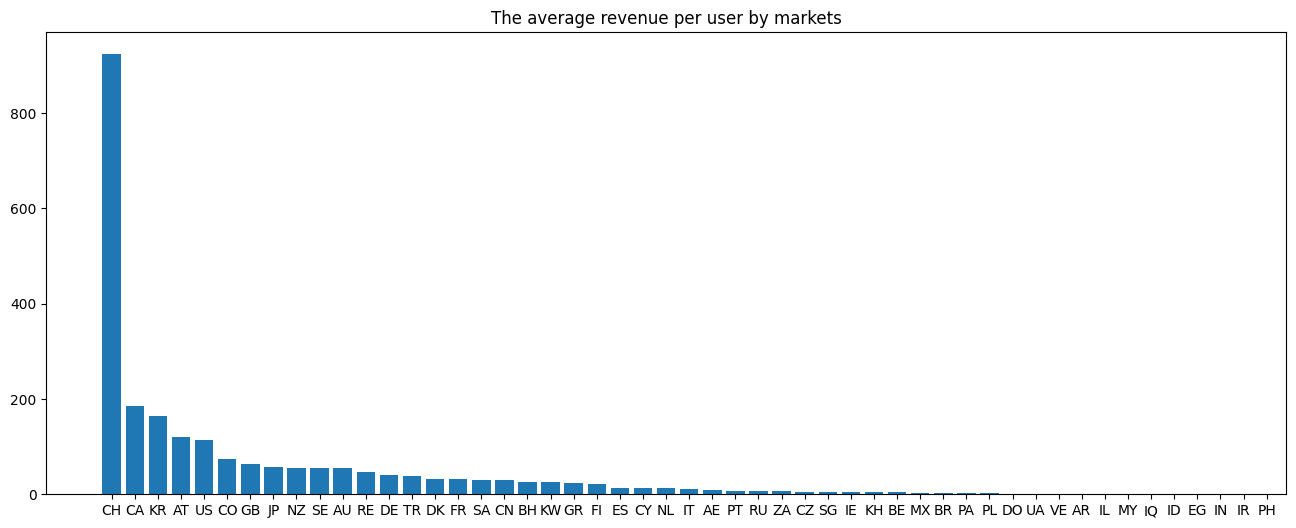

In [87]:
# create plot
plt.figure(figsize=(16,6))
plt.bar(merged_df_revenue_market.index, merged_df_revenue_market['revenue_per_user'])
plt.title('The average revenue per user by markets')
plt.show()

<p>We did some analysis on this already in the Geographical split of revenue -chapter, but here we can clearly see that revenue per user is very significantly larger in Switzerland than in any other markets. Canada and South Korea are also high on the list of revenue per user. Austria, which we didn't see before generates quite a lot of revenue per user. Colombia - quite surprisingly - is sixth in generated revenue per user.</p>